<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(_2)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2_n20.csv',
 'data_multi_delta_-2_n30.csv',
 'data_multi_delta_-2_n60.csv',
 'data_multi_delta_-2_n120.csv',
 'data_multi_delta_-2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,93.037232,73.732146,0.012604,176.781982,176.769494,0.012488
1,0.0,1.0,96.280907,47.015596,-0.001956,153.294547,153.294889,-0.000342
2,0.0,2.0,53.471161,86.028099,-0.001603,149.497656,149.500574,-0.002917
3,0.0,3.0,37.582553,38.518570,0.020056,86.121178,86.099587,0.021591
4,0.0,4.0,33.017889,77.458845,-0.000890,120.475844,120.477719,-0.001876
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,75.634299,51.861137,-0.011557,137.483879,137.495732,-0.011854
249996,999.0,246.0,65.245516,20.694635,0.001301,95.941452,95.941477,-0.000024
249997,999.0,247.0,81.723103,88.940795,-0.012453,180.651445,180.662581,-0.011136
249998,999.0,248.0,56.375293,60.024963,-0.000418,126.399838,126.398921,0.000917


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,93.037232,73.732146,0.012604,176.781982,176.769494,0.012488
1,0.0,1.0,96.280907,47.015596,-0.001956,153.294547,153.294889,-0.000342
2,0.0,2.0,53.471161,86.028099,-0.001603,149.497656,149.500574,-0.002917
3,0.0,3.0,37.582553,38.518570,0.020056,86.121178,86.099587,0.021591
4,0.0,4.0,33.017889,77.458845,-0.000890,120.475844,120.477719,-0.001876
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,75.634299,51.861137,-0.011557,137.483879,137.495732,-0.011854
249996,999.0,246.0,65.245516,20.694635,0.001301,95.941452,95.941477,-0.000024
249997,999.0,247.0,81.723103,88.940795,-0.012453,180.651445,180.662581,-0.011136
249998,999.0,248.0,56.375293,60.024963,-0.000418,126.399838,126.398921,0.000917


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    93.037232  73.732146  0.012604  176.781982  176.769494  0.012488
      1.0    96.280907  47.015596 -0.001956  153.294547  153.294889 -0.000342
      2.0    53.471161  86.028099 -0.001603  149.497656  149.500574 -0.002917
      3.0    37.582553  38.518570  0.020056   86.121178   86.099587  0.021591
      4.0    33.017889  77.458845 -0.000890  120.475844  120.477719 -0.001876
...                ...        ...       ...         ...         ...       ...
999.0 245.0  75.634299  51.861137 -0.011557  137.483879  137.495732 -0.011854
      246.0  65.245516  20.694635  0.001301   95.941452   95.941477 -0.000024
      247.0  81.723103  88.940795 -0.012453  180.651445  180.662581 -0.011136
      248.0  56.375293  60.024963 -0.000418  126.399838  126.398921  0.000917
      249.0  81.908241  69.549727 -0.011669  161.446299  161.457704 -0.011405

[250000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    93.037232  73.732146  0.012604  176.781982  176.769494  0.012488
      1.0    96.280907  47.015596 -0.001956  153.294547  153.294889 -0.000342
      2.0    53.471161  86.028099 -0.001603  149.497656  149.500574 -0.002917
      3.0    37.582553  38.518570  0.020056   86.121178   86.099587  0.021591
      4.0    33.017889  77.458845 -0.000890  120.475844  120.477719 -0.001876
...                ...        ...       ...         ...         ...       ...
999.0 245.0  75.634299  51.861137 -0.011557  137.483879  137.495732 -0.011854
      246.0  65.245516  20.694635  0.001301   95.941452   95.941477 -0.000024
      247.0  81.723103  88.940795 -0.012453  180.651445  180.662581 -0.011136
      248.0  56.375293  60.024963 -0.000418  126.399838  126.398921  0.000917
      249.0  81.908241  69.549727 -0.011669  161.446299  161.457704 -0.011405

[250000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,93.037232,73.732146,0.012604,176.781982,176.769494,0.012488
1,0.0,1.0,96.280907,47.015596,-0.001956,153.294547,153.294889,-0.000342
2,0.0,2.0,53.471161,86.028099,-0.001603,149.497656,149.500574,-0.002917
3,0.0,3.0,37.582553,38.518570,0.020056,86.121178,86.099587,0.021591
4,0.0,4.0,33.017889,77.458845,-0.000890,120.475844,120.477719,-0.001876
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,75.634299,51.861137,-0.011557,137.483879,137.495732,-0.011854
249996,999.0,246.0,65.245516,20.694635,0.001301,95.941452,95.941477,-0.000024
249997,999.0,247.0,81.723103,88.940795,-0.012453,180.651445,180.662581,-0.011136
249998,999.0,248.0,56.375293,60.024963,-0.000418,126.399838,126.398921,0.000917


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    93.037232  73.732146  0.012604  176.781982  176.769494  0.012488
      1.0    96.280907  47.015596 -0.001956  153.294547  153.294889 -0.000342
      2.0    53.471161  86.028099 -0.001603  149.497656  149.500574 -0.002917
      3.0    37.582553  38.518570  0.020056   86.121178   86.099587  0.021591
      4.0    33.017889  77.458845 -0.000890  120.475844  120.477719 -0.001876
...                ...        ...       ...         ...         ...       ...
999.0 245.0  75.634299  51.861137 -0.011557  137.483879  137.495732 -0.011854
      246.0  65.245516  20.694635  0.001301   95.941452   95.941477 -0.000024
      247.0  81.723103  88.940795 -0.012453  180.651445  180.662581 -0.011136
      248.0  56.375293  60.024963 -0.000418  126.399838  126.398921  0.000917
      249.0  81.908241  69.549727 -0.011669  161.446299  161.457704 -0.011405

[250000 rows x 6 columns]

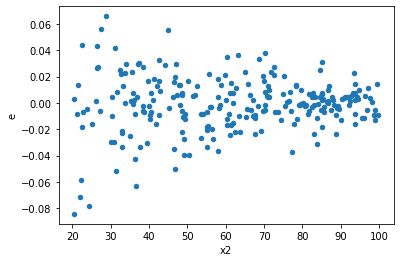

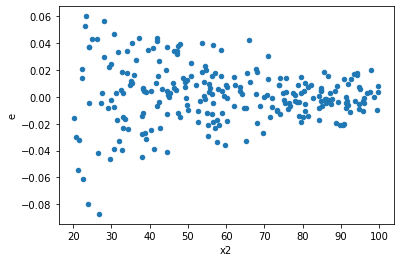

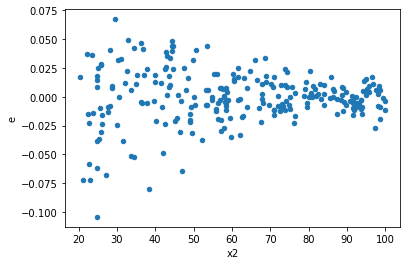

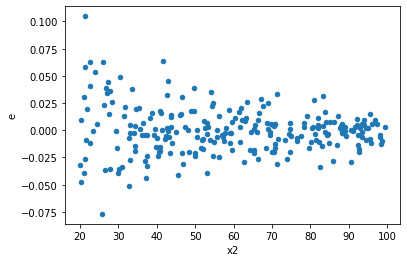

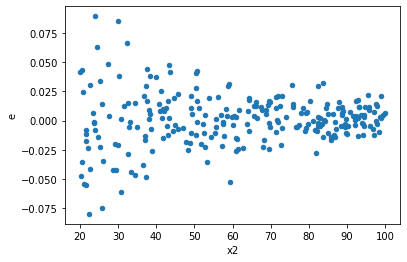

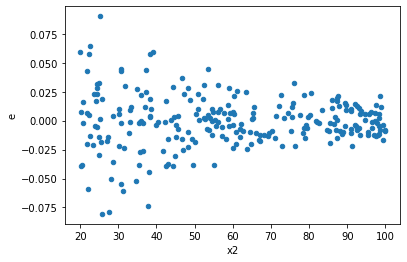

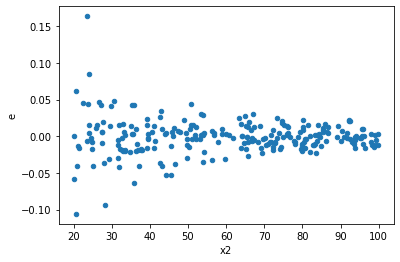

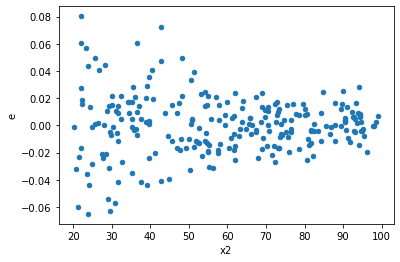

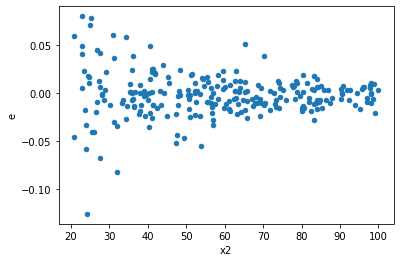

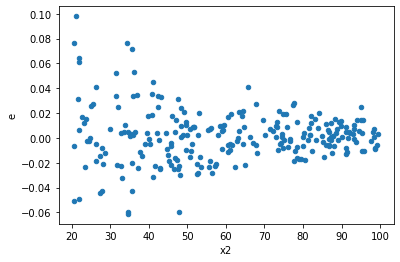

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,98.0,98.0,0.08773207960951249,0.012856453425458703,0.0008952253021378826,0.00013118830025978269,0.14654221674308426,6.964470181736106e-19,Reject005=0 : Heteroscedasticity
1.0,98.0,98.0,0.08936866643446828,0.012456383699139052,0.0009119251676986559,0.0001271059561136638,0.13938200262026954,1.0897781016321655e-19,Reject005=0 : Heteroscedasticity
2.0,98.0,98.0,0.09074421480836155,0.016055224274300714,0.000925961375595526,0.0001638288191255175,0.1769283508398523,5.82929618473408e-16,Reject005=0 : Heteroscedasticity
3.0,98.0,98.0,0.07170156022187375,0.011710889826061444,0.0007316485736925893,0.00011949887577613718,0.16332824264664805,3.519830563253517e-17,Reject005=0 : Heteroscedasticity
4.0,98.0,98.0,0.08786658940916181,0.014532879020271835,0.000896597851113896,0.00014829468388032483,0.16539709937525465,5.5022538146659166e-17,Reject005=0 : Heteroscedasticity
5.0,98.0,98.0,0.10973788550625593,0.015339851932284312,0.0011197743419005708,0.00015652910134983993,0.13978629040933924,1.2140063991238496e-19,Reject005=0 : Heteroscedasticity
6.0,98.0,98.0,0.07170410054414239,0.013124486787344512,0.0007316744953483917,0.0001339233345647399,0.18303676760110577,1.8744014093663108e-15,Reject005=0 : Heteroscedasticity
7.0,98.0,98.0,0.08856351768937568,0.009448246240197982,0.0009037093641773028,9.641067592038757e-05,0.10668327644049101,3.625072637282734e-24,Reject005=0 : Heteroscedasticity
8.0,98.0,98.0,0.1005538240466761,0.011356979077007752,0.0010260594290477153,0.00011588754160211992,0.11294427819807185,3.45282057564475e-23,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64